# **Stock Portfolio Forecasting and Optimization on S&P500 Using Machine Learning and Search Methods**
<img src="images/pr.jpg" style="width:100%; height:100%;">

## **Abstract**  
Stock market forecasting and portfolio optimization are pivotal challenges in financial decision-making, driven by the volatility and complexity of markets like the S&P500. This project aims to develop an efficient system that predicts stock price trends and optimizes investment portfolios, leveraging historical S&P500 data from 2010 to 2023.  

The solution integrates traditional Machine Learning algorithms (e.g., Random Forest, SVM) for accurate stock price prediction. Furthermore, optimization techniques such as Monte Carlo simulations and genetic algorithms are employed to construct portfolios that maximize returns or minimize risks over a short-term investment horizon.  

By combining predictive analytics with optimization methodologies, this work provides insight for data-driven financial decision-making, promoting effective investment strategies. Ethical considerations and regulatory implications are also addressed, ensuring responsible and practical application in real-world financial contexts.

## **Introduction**
### **Context of the Problem**
The stock market is inherently volatile and complex, making it challenging for investors to forecast stock price trends and optimize investment decisions. Within the S&P500 index, the ability to predict stock movements and construct efficient portfolios is crucial for maximizing returns while managing risks. Traditional methods often fall short in addressing the rapid fluctuations and interdependencies inherent in financial markets, necessitating data-driven, adaptive solutions.

Machine Learning (ML) and Deep Learning (DL) have shown significant potential in addressing these challenges by analyzing large historical datasets, identifying patterns, and predicting trends with improved accuracy. Additionally, portfolio optimization techniques, such as Monte Carlo simulations and genetic algorithms, can help select investments that maximize returns or minimize risks based on forecasted trends. Combining these approaches can streamline decision-making, reduce human bias, and enhance financial performance.

### **Objective of the work**
This project aims to develop a robust framework for predicting stock price trends and optimizing investment portfolios within the S&P500 index. By leveraging ML algorithms models, the objective is to build accurate forecasting systems. These predictions will feed into optimization techniques to create well-balanced investment portfolios over a one-month horizon.

### **Structure of the work**
This notebook is structured as follows:
- Data Acquisition and EDA : We will collect historical price data for all S&P500 stocks from 2010 to January 2024 to build predictive models. Additionally, we will extract relevant financial indices such as moving averages, volatility, and trading volume, which can provide valuable insights into market trends. An Exploratory Data Analysis (EDA) will be conducted to study correlations, detect trends, and evaluate patterns within the data for the predictive modeling process.

- Stock Market Forecasting : This section focuses on developing multi-output forecasting models using traditional Machine Learning techniques such as Random Forest and Support Vector Machines (SVM). These models aim to predict the daily prices of all 500 stocks within the S&P500 index. The performance of each model will be compared using regression metrics such as Root Mean Square Error (RMSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE) to determine their effectiveness.

- Model Hyperparameter Tuning : After identifying the most promising models, we will perform hyperparameter tuning to enhance their predictive accuracy further. Techniques such as grid search and randomized search will be employed, targeting optimal configurations for regression metrics. 

- Stock Portfolio Optimization: Building on the forecasting outputs, we will employ advanced optimization techniques, including Monte Carlo simulations and genetic algorithms, to construct efficient investment portfolios. The Monte Carlo simulations will model various potential scenarios to evaluate risk and return distributions, while genetic algorithms will optimize portfolio allocation by iteratively evolving toward the most profitable or least risky configurations. These methods will account for constraints such as diversification, transaction costs, and risk tolerance.

- Discussion and Future Work :  Finally, we will analyze the results, discussing the strengths and limitations of our methodology. This section will provide insights into the practical applications of our approach and suggest potential refinements, such as incorporating alternative datasets (e.g., economic indicators or sentiment analysis) or exploring novel optimization algorithms. Future research directions will aim to enhance both predictive accuracy and portfolio optimization for real-world financial challenges.

## **Data Acquisition**
As mentioned above, we will extract historical price data for all **current S&P500 stocks**. The list of stocks will be sourced from the S&P500 Wikipedia page, ensuring it reflects the most up-to-date composition of the index. Subsequently, we will utilize the Yahoo Finance API to retrieve the historical data for these stocks, covering the period from 2010 to January 2024. This dataset will include essential information such as daily opening and closing prices, trading volumes, and additional technical indicators. These data points will serve as the foundation for both the forecasting models and the portfolio optimization strategies.

In [4]:
# Libraries


import os
from datetime import datetime

# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection
from sklearn.feature_selection import VarianceThreshold

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Decomposition
from sklearn.decomposition import IncrementalPCA, PCA

# Regressors
from sklearn.multioutput import MultiOutputRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, 
    ExtraTreesRegressor, BaggingRegressor, HistGradientBoostingRegressor
)
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, ARDRegression, 
    HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor, SGDRegressor, 
    PoissonRegressor, TweedieRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Metrics
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
)

# Gradient Boosting Libraries
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Utility functions
from importlib import reload
import utils
from utils import (
    extract_sp500_companies, extract_stock, process_data, 
    join_stock_data, join_macro, join_technical_indicators
)

# Reload utilities
reload(utils)


<module 'utils' from 'c:\\Users\\user\\OneDrive - Universidad de Oviedo\\Escritorio\\UNI\\3ºAÑO\\LAB_IACD\\Proyecto_2_Lab_IACD\\Proyect2_LABIACD\\utils.py'>

In [ ]:
# URL de la página de Wikipedia
df = extract_sp500_companies()
companies = df['Símbolo']
df.head(5)




,Símbolo,Seguridad,Presentación ante la SEC,Sector GICS,Sub-industria GICS,Ubicación de la sede,Fecha de incorporación,Clave de índice central,Fundada
0,MMM,3M,reports,Industriales,Conglomerados Industriales,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industriales,Productos de Edificio,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Cuidado de Salud,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,A123,AbbVie,reports,Cuidado de Salud,Farmacéuticos,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,reports,Tecnología Informática,Consultoría Informática y Otros Servicios,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:


for stock in companies : 
    raw_stock_data = extract_stock(stock)
    if raw_stock_data is not None : 
        raw_stock_data.to_csv(f"data/raw_stocks/{stock}.csv")
        stock_data = process_data(f"data/raw_stocks/{stock}.csv")
        stock_data.to_csv(f"data/stocks/{stock}.csv")
    
stock_data.head()
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['A123']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for A123.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for ATVI.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for ABC.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for BRK.B.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for CDAY.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for DISH.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for RE.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FRC']: YFTzM

No data found for FRC.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLT']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for FLT.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for PEAK.



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

No data found for PKI.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PXD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


No data found for PXD.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for SBNY.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SIVB']: YFPr

No data found for SIVB.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

No data found for WRK.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,AdjustedClose,Close,High,Low,Open,Volume
0,2013-02-01 00:00:00+00:00,28.409880,31.010000,31.74,30.469999,31.50,66789100
1,2013-02-04 00:00:00+00:00,28.419044,31.020000,31.99,30.760000,31.09,7695400
2,2013-02-05 00:00:00+00:00,28.437372,31.040001,31.98,30.850000,31.25,5013200
3,2013-02-06 00:00:00+00:00,28.428205,31.030001,31.43,30.750000,30.98,2126100
4,2013-02-07 00:00:00+00:00,29.316874,32.000000,32.73,31.000000,31.00,3800800


In [ ]:

print(f"Raw Files Retrieved : {len(os.listdir('data/raw_stocks/'))}, Processed Files : {len(os.listdir('data/stocks/'))}")
raw_folder = "data/raw_stocks/"
raw_files = [os.path.splitext(file)[0] for file in os.listdir(raw_folder) if file.endswith('.csv')]
missing_companies = [company for company in companies if company not in raw_files]# Encontrar las empresas que están en companies pero no en raw_files
print(f"Companies without data : {missing_companies}")


Raw Files Retrieved : 488, Processed Files : 488
Companies without data : ['A123', 'ATVI', 'ABC', 'BRK.B', 'CDAY', 'DISH', 'RE', 'FRC', 'FLT', 'PEAK', 'PKI', 'PXD', 'SBNY', 'SIVB', 'WRK']


Hay 15 empresas con las cuales se tiene algún problema respecto al ticker por lo que tendremos que buscar el ticker apropiado en la pagina web de  [Yahoo Finance](https://finance.yahoo.com). Algunos de los problemas que nos encontramos fueron los siguientes : para la empresa Berkshire Hathaway, tiene 2 stocks operativos, uno enfocado en inversores de mayor capital y otro para aquellos con menos recursos. Aun así, hemos optado por incluir ambos stocks en el dataset debido a que no se puede excluir una debido a la gran importancia de los 2 tipos de acciones para la empresa. El First Republic Bank dejó de operar en mayo de 2023, debido a una crisi bancaria por lo que no lo incluiremos al igual que SVB Financial Group, el cual tuvo otra crisis bancaria y despareció del indice en marzo de 2023. 

In [ ]:

missing_companies_ticker=['ABBV','AIY.DE','COR','BRKA','BRKB','DAY','DISH','RE','CPAY','DOC','VST','BG','SWR.L']
for missing_stock in missing_companies_ticker: 
    raw_stock_data = extract_stock(missing_stock)
    if raw_stock_data is not None : 
        raw_stock_data.to_csv(f"data/raw_stocks/{stock}.csv")
        stock_data = process_data(f"data/raw_stocks/{stock}.csv")
        stock_data.to_csv(f"data/stocks/{stock}.csv")


In [ ]:





original_data     = join_stock_data(axis=True)
original_data['Date'] = pd.to_datetime(original_data['Date']).dt.tz_localize(None)
start = '2010-01-01'
end = '2024-01-31'

macro_data=join_macro(start,end)


raw_data = pd.merge(original_data, macro_data, on='Date', how='inner')


# Opcional: Ordenamos el resultado por stock_symbol y Date para claridad

raw_data = raw_data.sort_values(by=[ 'Date']).reset_index(drop=True)


raw_data=raw_data[raw_data['Date'].notna()]



raw_data.bfill( inplace=True)
raw_data.ffill(inplace=True)

raw_data.to_csv(f"data/raw_2d_data.csv")




c:\Users\user\OneDrive - Universidad de Oviedo\Escritorio\UNI\3ºAÑO\LAB_IACD\Proyecto_2_Lab_IACD\Proyect2_LABIACD\utils.py:86: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  final_dataset.reset_index(inplace=True)
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*

In [ ]:


# raw_df=pd.read_csv('data/raw_2d_data.csv')
# raw_data=raw_data.drop(columns=['Unnamed: 0'])
df = raw_data
print('Size of Horizontal Structure',raw_data.shape)



Size of Horizontal Structure (3542, 2959)


In [ ]:
df


,Date,AdjustedClose_A,Close_A,High_A,Low_A,Open_A,Volume_A,AdjustedClose_AAL,Close_AAL,High_AAL,...,^FTSE,CL=F,SI=F,GC=F,^HSI,NG=F,ZC=F,EURUSD=X,BTC-USD,HO=F
0,2010-01-04,20.053028,22.389128,22.625179,22.267525,22.453505,3815561,4.496877,4.77,4.94,...,5500.299805,81.510002,17.440001,1117.699951,21823.279297,5.884,418.50,1.442398,457.334015,2.1905
1,2010-01-05,19.835203,22.145924,22.331903,22.002861,22.324751,4186031,5.005958,5.31,5.37,...,5522.500000,81.769997,17.781000,1118.099976,22279.580078,5.637,418.75,1.436596,457.334015,2.1941
2,2010-01-06,19.764723,22.067240,22.174536,22.002861,22.067240,3243779,4.798554,5.09,5.38,...,5530.000000,83.180000,18.163000,1135.900024,22416.669922,6.009,421.75,1.440403,457.334015,2.2032
3,2010-01-07,19.739101,22.038628,22.045780,21.816881,22.017166,3095172,4.939964,5.24,5.43,...,5526.700195,82.660004,18.333000,1133.099976,22269.449219,5.806,417.50,1.431803,457.334015,2.1836
4,2010-01-08,19.732695,22.031473,22.067240,21.745352,21.917025,3733918,4.845690,5.14,5.43,...,5534.200195,82.750000,18.458000,1138.199951,22296.750000,5.749,423.00,1.441109,457.334015,2.2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3537,2024-01-24,129.123932,129.779999,132.800003,129.429993,132.410004,1141900,13.930000,13.93,14.18,...,7527.700195,75.089996,22.754999,2013.900024,15899.870117,2.641,452.25,1.085788,40077.074219,2.6818
3538,2024-01-25,129.223434,129.880005,131.429993,129.429993,131.110001,1120900,15.360000,15.36,15.46,...,7529.700195,77.360001,22.808001,2016.900024,16211.959961,2.571,451.75,1.088175,39933.808594,2.7954
3539,2024-01-26,130.327835,130.990005,134.229996,130.639999,133.710007,1319800,15.130000,15.13,15.84,...,7635.100098,78.010002,22.754999,2016.800049,15952.230469,2.712,446.25,1.084705,41816.871094,2.8434
3540,2024-01-29,132.158524,132.830002,132.899994,131.279999,131.750000,1407200,14.940000,14.94,15.39,...,7632.700195,76.779999,23.138000,2025.199951,16077.240234,2.490,440.25,1.084352,43288.246094,2.8339


In [ ]:
# Filtrar y mostrar columnas con valores nulos en df2
null_columns_df2 = df.isnull().sum()
print('Valores Nulos en Horizontal',null_columns_df2[null_columns_df2 > 0])

print('Duplicados: ',df.duplicated().sum())



# Iterar sobre todas las columnas menos 'Date'
for columna in df.columns:
    if columna not in ['Date'] :
        # Verificar valores no numéricos en la columna
        non_numeric_values = df[columna][~df[columna].apply(lambda x: isinstance(x, (int, float)))]
        # Convertir la columna a tipo numérico, forzando los errores a NaN
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
        


volume_columns = [col for col in df.columns if "Volume" in col]
for col in volume_columns: 
    df[col]=np.log1p(df[col])

# Crear una lista con los nombres de cada columna numérica, excluyendo "Date" y "Volume"
columnas_numericas = [col for col in df.columns if col not in ['Date']]




Valores Nulos en Horizontal Series([], dtype: int64)
Duplicados:  0


In [ ]:


df2=df.copy()

df2['Date']=pd.to_datetime(df2['Date'],format="ISO8601")

datos_tecnicos=join_technical_indicators(database=df2,axis=True)

df2 = pd.merge(df2, datos_tecnicos, on='Date', how='outer')
df2 = df2.sort_values(by=[ 'Date']).reset_index(drop=True)

df2['day']          = df2['Date'].dt.day.astype('float64')
df2['month']        = df2['Date'].dt.month.astype('float64')
df2['year']         = df2['Date'].dt.year.astype('float64')
df2['day_of_week']  = df2['Date'].dt.dayofweek.astype('float64')

display(df2.head(20))

train=df2[df2['Date']<'2024-01-01']
test=df2[df2['Date']>='2024-01-01']



,Date,AdjustedClose_A,Close_A,High_A,Low_A,Open_A,Volume_A,AdjustedClose_AAL,Close_AAL,High_AAL,...,MTM6_ZTS,MTM12_ZTS,ROC_ZTS,SMI_ZTS,WVAD_ZTS,RSI_ZTS,day,month,year,day_of_week
0,2010-01-04,20.053028,22.389128,22.625179,22.267525,22.453505,15.154599,4.496877,4.77,4.94,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,4.0,1.0,2010.0,0.0
1,2010-01-05,19.835203,22.145924,22.331903,22.002861,22.324751,15.247264,5.005958,5.31,5.37,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,5.0,1.0,2010.0,1.0
2,2010-01-06,19.764723,22.067240,22.174536,22.002861,22.067240,14.992250,4.798554,5.09,5.38,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,6.0,1.0,2010.0,2.0
3,2010-01-07,19.739101,22.038628,22.045780,21.816881,22.017166,14.945354,4.939964,5.24,5.43,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,7.0,1.0,2010.0,3.0
4,2010-01-08,19.732695,22.031473,22.067240,21.745352,21.917025,15.132969,4.845690,5.14,5.43,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,8.0,1.0,2010.0,4.0
5,2010-01-11,19.745504,22.045780,22.210300,21.938484,22.088697,15.380282,4.751417,5.04,5.23,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,11.0,1.0,2010.0,0.0
6,2010-01-12,19.508461,21.781116,21.924177,21.616594,21.859800,14.870197,4.789125,5.08,5.15,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,12.0,1.0,2010.0,1.0
7,2010-01-13,19.662218,21.952789,22.017166,21.494993,21.795422,15.044844,5.166223,5.48,5.50,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,13.0,1.0,2010.0,2.0
8,2010-01-14,19.956932,22.281832,22.346209,21.816881,21.881260,15.634201,5.269924,5.59,5.71,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,14.0,1.0,2010.0,3.0
9,2010-01-15,19.495640,21.766809,22.432047,21.695278,22.331903,15.347351,5.185078,5.50,5.84,...,0.0,0.0,0.0,42.519742,-6.951455,100.0,15.0,1.0,2010.0,4.0


['Date',
 'AdjustedClose_A',
 'Close_A',
 'High_A',
 'Low_A',
 'Open_A',
 'Volume_A',
 'AdjustedClose_AAL',
 'Close_AAL',
 'High_AAL',
 'Low_AAL',
 'Open_AAL',
 'Volume_AAL',
 'AdjustedClose_AAP',
 'Close_AAP',
 'High_AAP',
 'Low_AAP',
 'Open_AAP',
 'Volume_AAP',
 'AdjustedClose_AAPL',
 'Close_AAPL',
 'High_AAPL',
 'Low_AAPL',
 'Open_AAPL',
 'Volume_AAPL',
 'AdjustedClose_ABT',
 'Close_ABT',
 'High_ABT',
 'Low_ABT',
 'Open_ABT',
 'Volume_ABT',
 'AdjustedClose_ACGL',
 'Close_ACGL',
 'High_ACGL',
 'Low_ACGL',
 'Open_ACGL',
 'Volume_ACGL',
 'AdjustedClose_ACN',
 'Close_ACN',
 'High_ACN',
 'Low_ACN',
 'Open_ACN',
 'Volume_ACN',
 'AdjustedClose_ADBE',
 'Close_ADBE',
 'High_ADBE',
 'Low_ADBE',
 'Open_ADBE',
 'Volume_ADBE',
 'AdjustedClose_ADI',
 'Close_ADI',
 'High_ADI',
 'Low_ADI',
 'Open_ADI',
 'Volume_ADI',
 'AdjustedClose_ADM',
 'Close_ADM',
 'High_ADM',
 'Low_ADM',
 'Open_ADM',
 'Volume_ADM',
 'AdjustedClose_ADP',
 'Close_ADP',
 'High_ADP',
 'Low_ADP',
 'Open_ADP',
 'Volume_ADP',
 'Adju

#### Feature Selection


In [35]:


print('Dimensión de train :',train.shape)
display('Información de train :')
train.info()
display(train.columns)

Dimensión de train : (3522, 9795)


'Información de train :'

<class 'pandas.core.frame.DataFrame'>
Index: 3522 entries, 0 to 3521
Columns: 9795 entries, Date to day_of_week
dtypes: datetime64[ns](1), float64(9794)
memory usage: 263.2 MB


Index(['Date', 'AdjustedClose_A', 'Close_A', 'High_A', 'Low_A', 'Open_A',
       'Volume_A', 'AdjustedClose_AAL', 'Close_AAL', 'High_AAL',
       ...
       'MTM6_ZTS', 'MTM12_ZTS', 'ROC_ZTS', 'SMI_ZTS', 'WVAD_ZTS', 'RSI_ZTS',
       'day', 'month', 'year', 'day_of_week'],
      dtype='object', length=9795)

In [ ]:


train.to_csv('train.csv')
test.to_csv('test.csv')




# **2D Structure**

Hora  Antes del PCA: 18:05:06.612700
Número de componentes principales seleccionados: 779
Número de componentes según el criterio de Kaiser (covarianza): 66
Número de componentes según el criterio de Kaiser(correlación): 460
Hora DESPUES DE MOSTRAR COMPONENTES : 18:06:34.954984
Hora : 18:07:48.439115


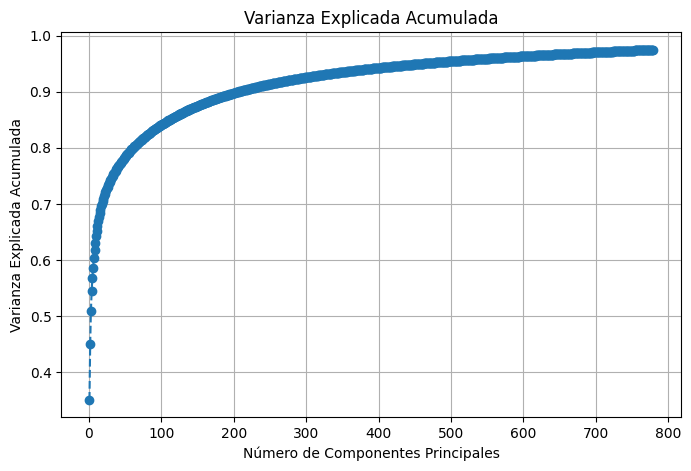

In [ ]:



train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')


# 
cols_objetivo=[col for col in train.columns if "Close" in col] + ['Date']
cols_objetivo_2=[col for col in train.columns if "Close" in col] 

remove=[col for col in cols_objetivo_2 if "Adjusted" in col] 

X_train = train.drop(columns=cols_objetivo)  # Excluye columnas irrelevantes
X_test =test.drop(columns=cols_objetivo)

y_train = train[cols_objetivo_2].drop(columns=remove)   # El objetivo es el precio de cierre y excluimos Adjusted que inlcuye el string Close
y_test =test[cols_objetivo_2].drop(columns=remove)




scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)




# Imprimir la hora
print("Hora  Antes del PCA:", datetime.now().time())
# Aplicar PCA

# Calcular el número de componentes con PCA estándar
pca_temp = PCA(n_components=0.975)  
pca_temp.fit(X_train)  # X_scaled: datos escalados (preprocesados)

# Número de componentes necesarios
n_components_needed = pca_temp.n_components_

# Número de componentes seleccionados
print("Número de componentes principales seleccionados:", pca_temp.n_components_)

# Calcular autovalores (varianza explicada por cada componente)
autovalores = pca_temp.explained_variance_

# Media de los autovalores (para matriz de covarianza)
media_autovalores_cov = np.mean(autovalores)

# Aplicar el criterio de Kaiser: autovalores > media de los autovalores
criterio_kaiser_cov = autovalores > media_autovalores_cov
# print(f"Componentes que cumplen el criterio de Kaiser (covarianza): {criterio_kaiser_cov}")

# Número de componentes que cumplen el criterio de Kaiser
n_componentes_kaiser = np.sum(criterio_kaiser_cov)
print(f"Número de componentes según el criterio de Kaiser (covarianza): {n_componentes_kaiser}")

# Para la matriz de correlación, la media de los autovalores es 1 por construcción
criterio_kaiser_cor = autovalores > 1
# print(f"Componentes que cumplen el criterio de Kaiser (correlación): {criterio_kaiser_cor}")

# Número de componentes que cumplen el criterio de Kaiser
n_componentes_kaiser = np.sum(criterio_kaiser_cor)
print(f"Número de componentes según el criterio de Kaiser(correlación): {n_componentes_kaiser}") 
print("Hora DESPUES DE MOSTRAR COMPONENTES :", datetime.now().time())
ipca = IncrementalPCA(n_components=n_components_needed)
X_train_2 = ipca.fit_transform(X_train)



# Varianza explicada
varianza_explicada = ipca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)
print("Hora :", datetime.now().time())

# Crear gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()



## Forecasting Model 

Training and evaluating DummyRegressor...
Training and evaluating RandomForest...
Training and evaluating GradientBoosting...
Training and evaluating AdaBoost...
Training and evaluating KNN...
Training and evaluating LinearRegression...
Training and evaluating DecisionTree...
Training and evaluating SVR...
Training and evaluating ExtraTrees...
Training and evaluating Bagging...
Training and evaluating Ridge...
Training and evaluating Lasso...
Training and evaluating ElasticNet...
Training and evaluating BayesianRidge...
Training and evaluating ARDRegression...
Training and evaluating Huber...
Training and evaluating PassiveAggressive...
Training and evaluating TheilSen...
Training and evaluating SGDRegressor...
Training and evaluating CatBoost...
0:	learn: 2377.9252118	total: 1.38s	remaining: 1m 7s
1:	learn: 2314.2092298	total: 2.76s	remaining: 1m 6s
2:	learn: 2253.4374411	total: 4.54s	remaining: 1m 11s
3:	learn: 2195.1658601	total: 5.95s	remaining: 1m 8s
4:	learn: 2137.4847193	total: 

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\OneDrive - Universidad de Oviedo\\Escritorio\\UNI\\3ºAÑO\\LAB_IACD\\Proyecto_2_Lab_IACD\\Proyect2_LABIACD\\plots\\MSE_comparison_models.png'

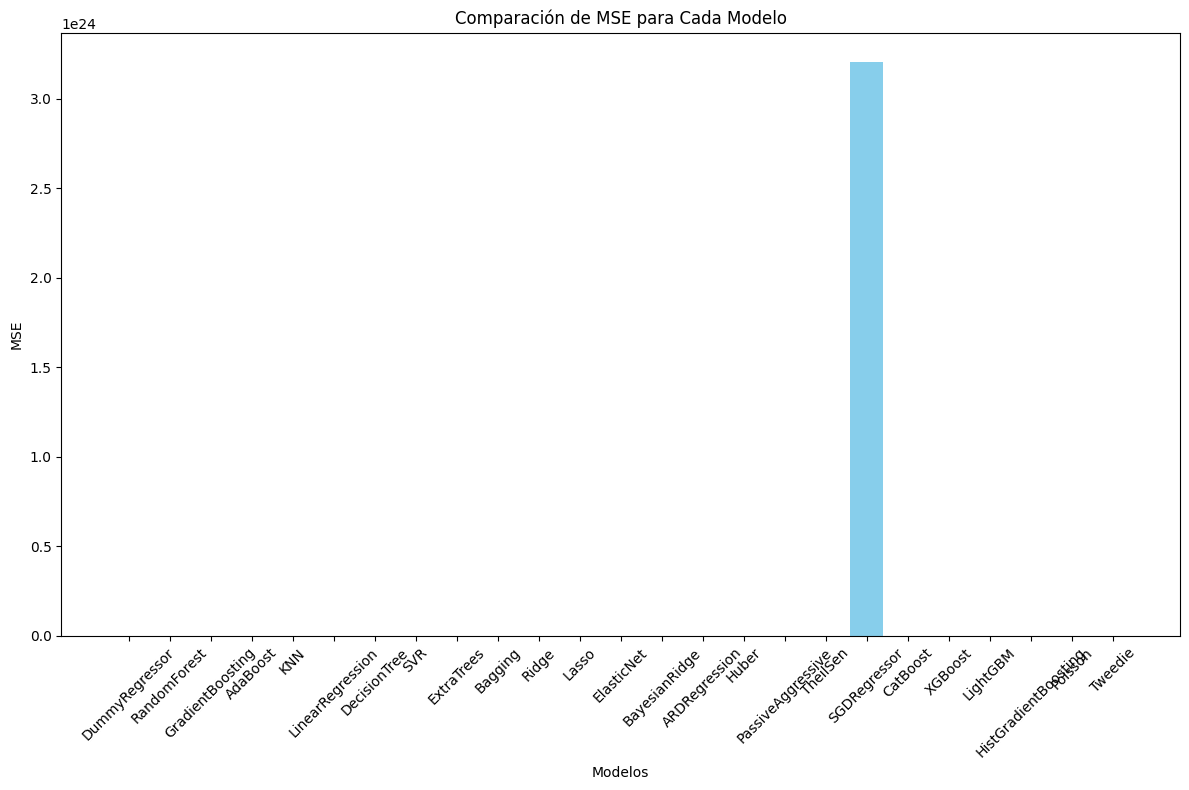

In [ ]:
# Crear el modelo de Gradient Boosting (XGBoost)
metrics={
    'MSE':[]
    ,'MAE':[] 
    ,'RMSE':[]
    ,'R2':[]
    ,'MAPE':[]
}

models = {
    'DummyRegressor': MultiOutputRegressor(DummyRegressor()),  # Baseline sin ningún ajuste
    'RandomForest': MultiOutputRegressor(RandomForestRegressor(n_jobs=1, max_depth=3, n_estimators=50)),  # Reducimos la profundidad máxima y el número de estimadores
    'GradientBoosting': MultiOutputRegressor(GradientBoostingRegressor(max_depth=3, n_estimators=50)),  # Reducimos la profundidad máxima y el número de estimadores
    'AdaBoost': MultiOutputRegressor(AdaBoostRegressor(n_estimators=50)),  # Reducimos el número de estimadores
    'KNN': MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5, n_jobs=1)),  # Reducimos el número de vecinos
    'LinearRegression': MultiOutputRegressor(LinearRegression(n_jobs=1)),  # Sin cambios (es un modelo simple por defecto)
    'DecisionTree': MultiOutputRegressor(DecisionTreeRegressor(max_depth=4)),  # Reducimos la profundidad máxima
    'SVR': MultiOutputRegressor(SVR(C=0.5)),  # Reducimos el valor de C para limitar la complejidad
    # 'GaussianProcess': MultiOutputRegressor(GaussianProcessRegressor(alpha=1e-1)),  # Aumentamos alpha para agregar regularización
    'ExtraTrees': MultiOutputRegressor(ExtraTreesRegressor(n_jobs=1, max_depth=4, n_estimators=50)),  # Reducimos la profundidad máxima y el número de estimadores
    'Bagging': MultiOutputRegressor(BaggingRegressor(n_jobs=1, n_estimators=20)),  # Reducimos el número de estimadores
    'Ridge': MultiOutputRegressor(Ridge(alpha=1.0)),  # Establecemos alpha para controlar la regularización
    'Lasso': MultiOutputRegressor(Lasso(alpha=0.1)),  # Establecemos alpha para limitar la complejidad
    'ElasticNet': MultiOutputRegressor(ElasticNet(alpha=0.1, l1_ratio=0.5)),  # Reducimos alpha y ajustamos l1_ratio
    'BayesianRidge': MultiOutputRegressor(BayesianRidge()),  # Sin cambios (modelo simple por defecto)
    'ARDRegression': MultiOutputRegressor(ARDRegression(alpha_1=1e-6, alpha_2=1e-6)),  # Aumentamos los valores de alpha para mayor regularización
    'Huber': MultiOutputRegressor(HuberRegressor(alpha=0.1)),  # Establecemos alpha para controlar la regularización
    'PassiveAggressive': MultiOutputRegressor(PassiveAggressiveRegressor(C=0.5, max_iter=100)),  # Reducimos C y limitamos el número de iteraciones
    'TheilSen': MultiOutputRegressor(TheilSenRegressor(n_jobs=1, max_subpopulation=1000)),  # Limitamos el tamaño de la subpoblación
    'SGDRegressor': MultiOutputRegressor(SGDRegressor(alpha=0.01, max_iter=1000)),  # Reducimos el número de iteraciones y ajustamos alpha
    'CatBoost': CatBoostRegressor(thread_count=1, loss_function='MultiRMSE', depth=4, iterations=50),  # Reducimos la profundidad y el número de iteraciones
    'XGBoost': XGBRegressor(n_jobs=1, objective='reg:squarederror', max_depth=4, n_estimators=50),  # Reducimos la profundidad y el número de estimadores
    'LightGBM': MultiOutputRegressor(LGBMRegressor(n_jobs=1, objective='regression_l2')),  # Adaptar para multisalida
    'HistGradientBoosting': MultiOutputRegressor(HistGradientBoostingRegressor(max_iter=50, max_depth=4)),  # Reducimos el número de iteraciones y la profundidad
    'Poisson': MultiOutputRegressor(PoissonRegressor(alpha=1.0, max_iter=100)),  # Aumentamos alpha y limitamos el número de iteraciones
    'Tweedie': MultiOutputRegressor(TweedieRegressor(alpha=1.0, max_iter=100))  # Aumentamos alpha y limitamos el número de iteraciones
}

metrics_df = pd.DataFrame(columns=metrics, index=models.keys())
for name, model in models.items(): 
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)  # Salida: un vector de 30 precios para las 500 acciones
    # Calcular métricas de evaluación
    print(' and evaluating ')
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    metrics_df.loc[name] = [mse, rmse, mae, r2, mape]

display(metrics_df.sort_values(by=['RMSE','MAPE'],ascending=True))



,MSE,MAE,RMSE,R2,MAPE
Bagging,838.179318,28.951327,11.849393,-19.265556,0.070656
XGBoost,843.277415,29.039239,12.429821,-21.810621,0.075344
LightGBM,1233.661652,35.12352,12.74017,-20.192405,0.074021
GradientBoosting,1075.112632,32.78891,12.939591,-20.637166,0.077952
HistGradientBoosting,1234.392234,35.133919,13.451686,-20.555394,0.077909
DecisionTree,2943.81465,54.256932,16.847036,-40.245753,0.097896
AdaBoost,2584.173062,50.834762,17.387287,-30.533782,0.100878
Poisson,1820.388904,42.666016,18.460344,-50.365801,0.119625
LinearRegression,2805.49129,52.966889,18.663361,-39.144603,0.112203
Ridge,2805.498728,52.966959,18.663372,-39.144596,0.112203


<class 'pandas.core.frame.DataFrame'>


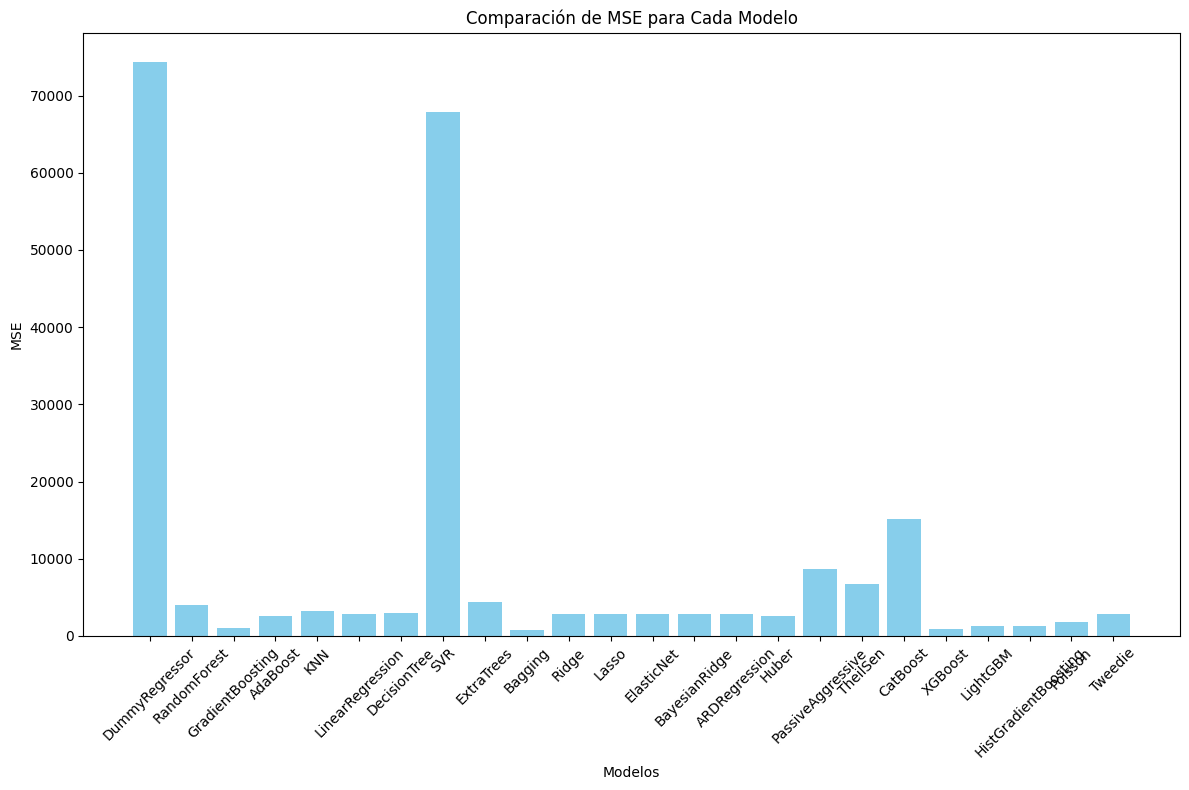

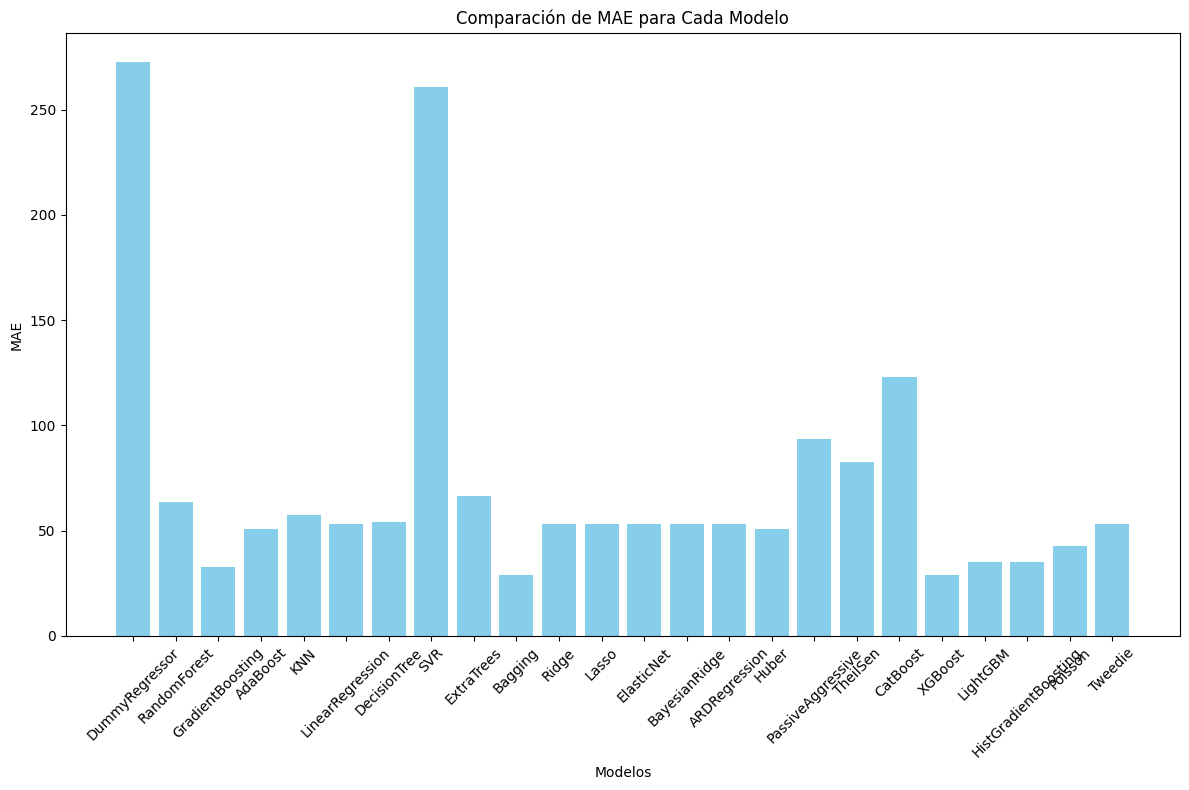

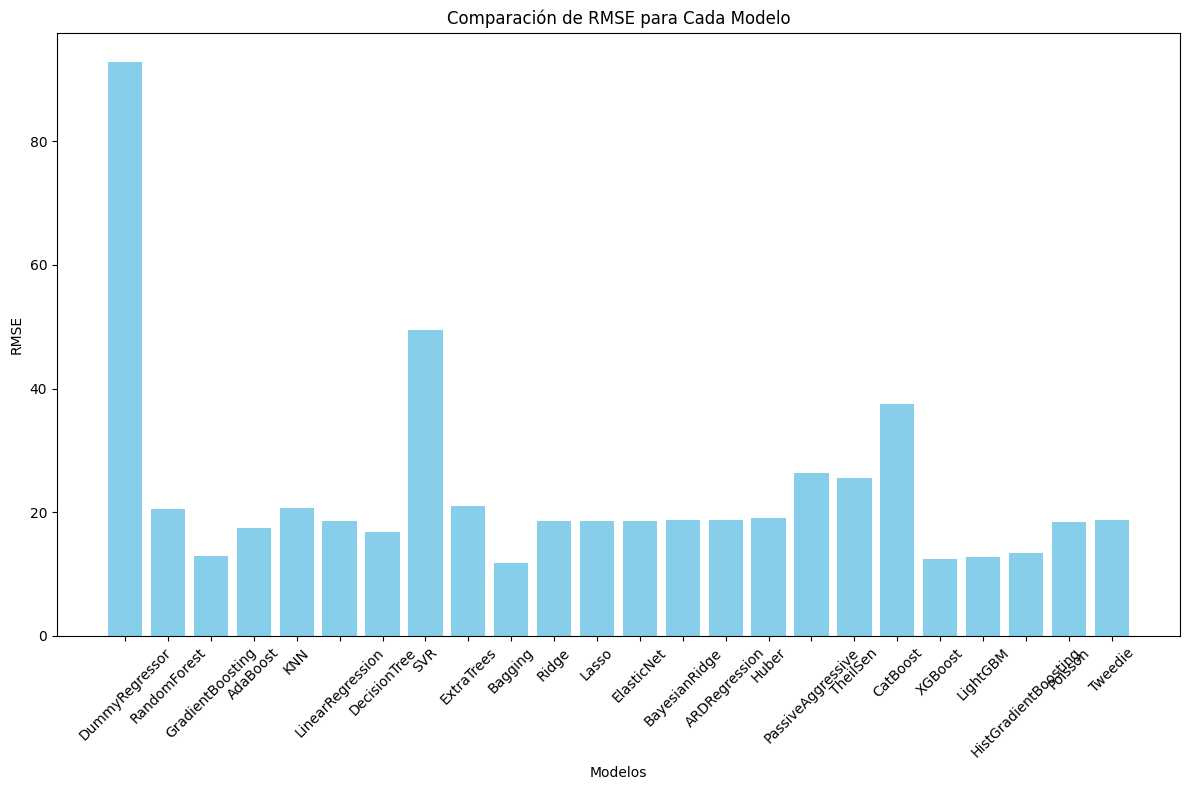

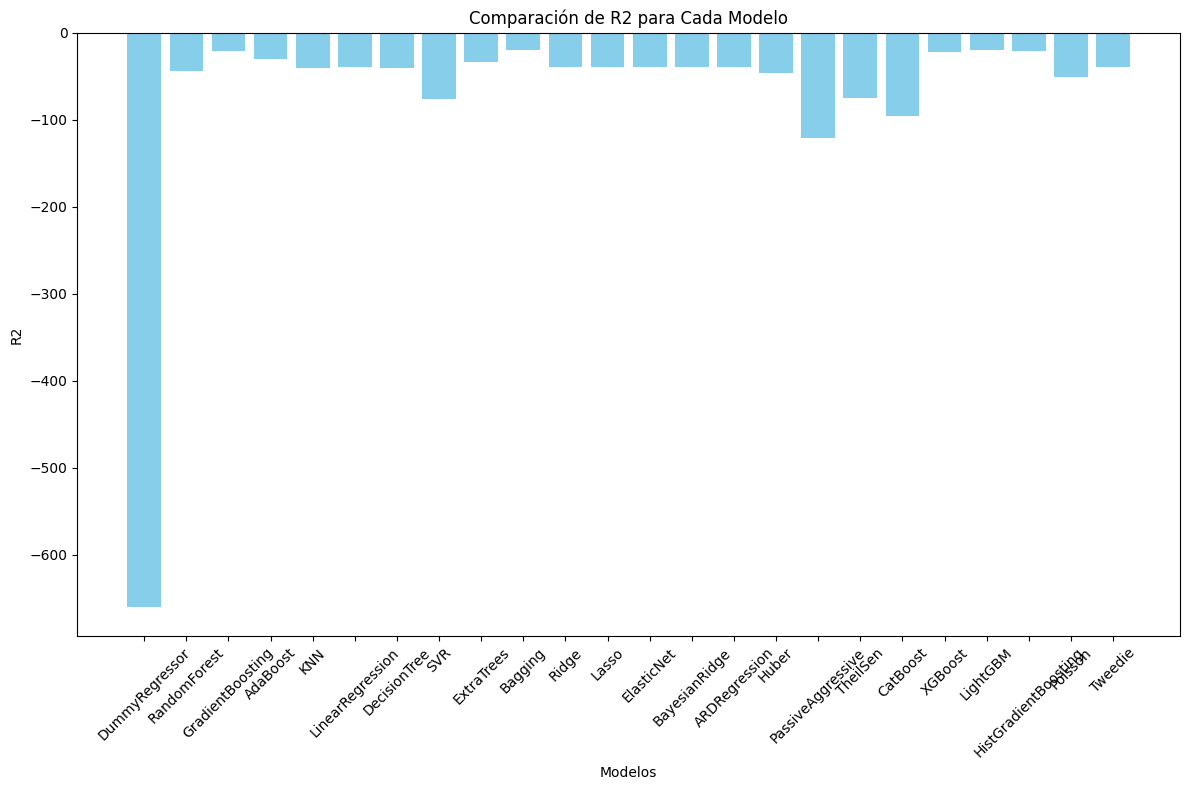

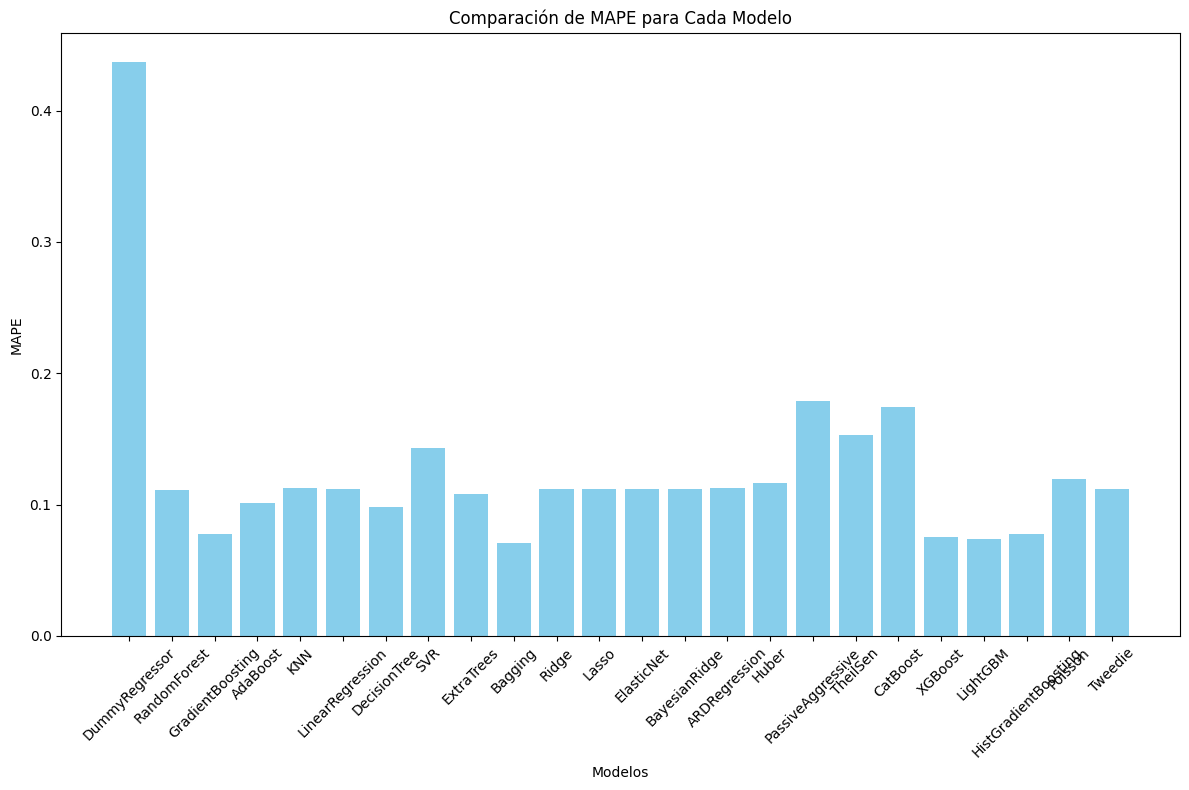

In [27]:
display(metrics_df.sort_values(by=['RMSE','MAPE'],ascending=True))

print(type(metrics_df))
# Graficar métricas para cada modelo
for metric in metrics:dd
    plt.figure(figsize=(12, 8))
    plt.bar(metrics_df.index, metrics_df[metric], color='skyblue')
    plt.xlabel('Modelos')
    plt.ylabel(metric)
    plt.title(f'Comparación de {metric} para Cada Modelo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Guardar el gráfico en un archivo
    plt.savefig(f'plots/{metric}_comparison_models.png')
    plt.show()

### **Hyperparameter tuning**

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
 
cols_objetivo=[col for col in train.columns if "Close" in col] + ['Date']
cols_objetivo_2=[col for col in train.columns if "Close" in col] 

remove=[col for col in cols_objetivo_2 if "Adjusted" in col] 

X_train = train.drop(columns=cols_objetivo)  # Excluye columnas irrelevantes
X_test =test.drop(columns=cols_objetivo)

y_train = train[cols_objetivo_2].drop(columns=remove)   # El objetivo es el precio de cierre y excluimos Adjusted que inlcuye el string Close
y_test =test[cols_objetivo_2].drop(columns=remove)




scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
list_componentes=[6,10,15,25,35,50,75,100,150,200,250,350,466]
lista_cjts_train=[]
lista_cjts_test=[]
# Definir tamaño del lote
for n_components_needed in list_componentes:

    ipca = IncrementalPCA(n_components=n_components_needed)
    X_train_2 = ipca.fit_transform(X_train)
    lista_cjts_train.append(X_train)
    X_test_2  = ipca.transform(X_test)
    lista_cjts_test.append(X_test)


models = {

    'Bagging': MultiOutputRegressor(BaggingRegressor(n_jobs=1, n_estimators=20)),  # Reducimos el número de estimadores
    'XGBoost': XGBRegressor(n_jobs=1, objective='reg:squarederror', max_depth=4, n_estimators=50),  # Reducimos la profundidad y el número de estimadores
    'LightGBM': MultiOutputRegressor(LGBMRegressor(n_jobs=1, objective='regression_l2')),  # Adaptar para multisalida

}

all_metrics_df = {metric: pd.DataFrame(columns=models.keys()) for metric in metrics}
components=[str(c) for c in list_componentes]
 
for (X_train,X_test,comp) in zip(lista_cjts_train,lista_cjts_test,components):
    print(X_train.shape)
    print(f"Shape of y_train: {y_train.shape}")
    print(f"Shape of y_test: {y_test.shape}")

    metrics_df = pd.DataFrame(columns=metrics, index=models.keys())
    for name,model in models.items(): 
        print(f"Training and evaluating {name} for {comp} components...")

        model.fit(X_train, y_train)
        predictions = model.predict(X_test)  # Salida: un vector de 30 precios para las 500 acciones
        # Calcular métricas de evaluación
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        mape= mean_absolute_percentage_error(y_test,predictions)

        metrics_df.loc[name] = [mse, rmse, mae, r2, mape]
    # Append results to the overall DataFrame
    for metric in metrics:
        all_metrics_df[metric][comp] = metrics_df[metric]

for metric in metrics:
    plt.figure(figsize=(12, 8))
    
    # Para cada modelo, trazar las métricas a través de los diferentes componentes
    for model in models.keys():
        plt.plot(components, all_metrics_df[metric].loc[model], marker='o', label=model)
    
    plt.xlabel('Number of Components (PCA)')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} for Each Model while increasing nº comp in PCA')
    plt.xticks(rotation=45)
    plt.legend(title='Machine Learning Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    
    # Guardar el gráfico en un archivo
    plt.savefig(f'plots/{metric}_comparison_models.png')
    plt.show()





# **3D Structure**

## From 2D to 3D

In [ ]:
train.to_csv('train.csv')
test.to_csv('test.csv')
def transformar_a_tensor_3d(df, empresas, columnas_macro):
    """
    Convierte un DataFrame en un tensor 3D (Tiempo * Empresas * Características).
    """
    fechas = df['Date'].unique()  # Fechas únicas
    num_fechas = len(fechas)
    num_empresas = len(empresas)
    num_caracteristicas_empresa = max(len([col for col in df.columns if f"_{empresa}" in col]) for empresa in empresas)
    num_caracteristicas_macro = len(columnas_macro)
    num_caracteristicas_total = num_caracteristicas_empresa + num_caracteristicas_macro

    # Inicializar el tensor
    tensor = np.zeros((num_fechas, num_empresas, num_caracteristicas_total))

    # Llenar el tensor
    for t, fecha in enumerate(fechas):
        df_fecha = df[df['Date'] == fecha]
        # Variables macroeconómicas para la fecha actual
        macro_vals = df_fecha[columnas_macro].iloc[0].values if not df_fecha.empty else np.zeros(num_caracteristicas_macro)
        
        for i, empresa in enumerate(empresas):
            # Columnas específicas de la empresa
            cols_empresa = [col for col in df.columns if f"_{empresa}" in col]
            datos_empresa = df_fecha[cols_empresa].values.flatten() if not df_fecha.empty else np.zeros(len(cols_empresa))
            # Combinar datos de empresa y variables macroeconómicas
            datos_combinados = np.concatenate([datos_empresa, macro_vals])
            tensor[t, i, :] = datos_combinados
    
    return tensor

# Listado de empresas y columnas macroeconómicas
empresas = sorted(set(col.split('_')[-1] for col in train.columns if '_' in col))
columnas_macro = [
    'GDP',
    'UNRATE',
    'CPIAUCSL',
    'PAYEMS',
    'FEDFUNDS',
    'DGS10',
    'M1SL',
    'M2SL',
    '^GSPC',
    'INDPRO',
    'RSAFS',
    'EXCAUS',
    'BOPGSTB',
    'GFDEBTN',
    'FGEXPND',
    'PCEPI',
    'PPIACO',
    '^IXIC',
    '^RUT',
    '^STOXX50E',
    '^FTSE',
    'CL=F',
    'SI=F',
    'GC=F',
    '^HSI',
    'NG=F',
    'ZC=F',
    'EURUSD=X',
    'BTC-USD',
    'HO=F',
    'ZC=F'
]

# Transformar conjuntos de entrenamiento y prueba
tensor_train = transformar_a_tensor_3d(train, empresas, columnas_macro)
tensor_test = transformar_a_tensor_3d(test, empresas, columnas_macro)


In [ ]:

# Aplanar los datos de entrenamiento para ajustar el escalador
train_2d = tensor_train.reshape(-1, tensor_train.shape[-1])
scaler = StandardScaler()
train_2d_scaled = scaler.fit_transform(train_2d)

# Escalar el conjunto de prueba utilizando el escalador ajustado
test_2d = tensor_test.reshape(-1, tensor_test.shape[-1])
test_2d_scaled = scaler.transform(test_2d)

# Volver a la forma 3D
tensor_train_scaled = train_2d_scaled.reshape(tensor_train.shape)
tensor_test_scaled = test_2d_scaled.reshape(tensor_test.shape)


In [ ]:
ventana = 22  # Días de entrada
horizonte = 1  # Días a predecir

def crear_ventanas_temporales(tensor, ventana, horizonte):
    X = []
    y = []
    for t in range(ventana, tensor.shape[0] - horizonte):
        X.append(tensor[t - ventana:t, :, :])
        y.append(tensor[t + horizonte, :, 0])  # Supongamos que el precio de cierre está en la primera posición
    return np.array(X), np.array(y)

# Crear ventanas para entrenamiento y prueba
X_train, y_train = crear_ventanas_temporales(tensor_train_scaled, ventana, horizonte)
X_test, y_test = crear_ventanas_temporales(tensor_test_scaled, ventana, horizonte)


In [ ]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


# **Hyperparamater tuning**

# **Portfolio Optimization**